# 3. Data Visualization
*Note: If you are prompted to select a kernel, please select PyTorch 1.8 Python 3.6*

In this notebook we will visualize our sample data set.

You can select Run->Run All Cells from the menu to run all cells in Studio (or Cell->Run All in a SageMaker Notebook Instance).

This solution relies on a config file to run the provisioned AWS resources. Run the cell below to generate that file.

In [2]:
import boto3
import os
import json

client = boto3.client('servicecatalog')
cwd = os.getcwd().split('/')
i= cwd.index('S3Downloads')
pp_name = cwd[i + 1]
pp = client.describe_provisioned_product(Name=pp_name)
record_id = pp['ProvisionedProductDetail']['LastSuccessfulProvisioningRecordId']
record = client.describe_record(Id=record_id)

keys = [ x['OutputKey'] for x in record['RecordOutputs'] if 'OutputKey' and 'OutputValue' in x]
values = [ x['OutputValue'] for x in record['RecordOutputs'] if 'OutputKey' and 'OutputValue' in x]
stack_output = dict(zip(keys, values))

with open(f'/root/S3Downloads/{pp_name}/stack_outputs.json', 'w') as f:
    json.dump(stack_output, f)


## Dependency install

In [3]:
!pip install -I ipywidgets --no-index --find-links file://$PWD/wheelhouse
!jupyter nbextension enable --py widgetsnbextension

Looking in links: file:///root/S3Downloads/jumpstart-prod-fpm_k96rp4/wheelhouse
Processing ./wheelhouse/ipywidgets-7.7.0-py2.py3-none-any.whl
Processing ./wheelhouse/ipykernel-6.13.0-py3-none-any.whl
Processing ./wheelhouse/traitlets-5.2.2.post1-py3-none-any.whl
Processing ./wheelhouse/widgetsnbextension-3.6.0-py2.py3-none-any.whl
Processing ./wheelhouse/ipython_genutils-0.2.0-py2.py3-none-any.whl
Processing ./wheelhouse/nbformat-5.4.0-py3-none-any.whl
Processing ./wheelhouse/jupyterlab_widgets-1.1.0-py3-none-any.whl
Processing ./wheelhouse/ipython-8.4.0-py3-none-any.whl
Processing ./wheelhouse/tornado-6.1-cp38-cp38-manylinux2010_x86_64.whl
Processing ./wheelhouse/matplotlib_inline-0.1.3-py3-none-any.whl
Processing ./wheelhouse/packaging-21.3-py3-none-any.whl
Processing ./wheelhouse/psutil-5.9.1-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Processing ./wheelhouse/nest_asyncio-1.5.5-py3-none-any.whl
Processing ./wheelhouse/jupyter_c

In [4]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from source.config import Config
from source.visualization.plot_utils import build_chart
from source.dl_utils.dataset import PMDataset_torch

np.random.seed(12345)

%matplotlib inline
plt.style.use('ggplot')
colour_options = ["#81ecec", "#a29bfe", "#fd79a8", "#ffeaa7", "#b2bec3", "#00b894", "#ff7675", "#e84393", "#e17055"]

## Define the data path in the config file

In [5]:
config = Config(filename="config/config.yaml")

## Check the input data

In [ ]:
df = pd.read_csv(config.train_dataset_fn)
@interact(x=(0, 20, 1))
def show_articles_more_than(x=10):
    return df.head(x)

In [7]:
df.describe()

,vehicle_id,period_ms,target,year,voltage_0,voltage_1,voltage_2,voltage_3,voltage_4,voltage_5,...,current_10,current_11,current_12,current_13,current_14,current_15,current_16,current_17,current_18,current_19
count,6336.000000,6336.0,6336.000000,6336.000000,6336.000000,6336.000000,6336.000000,6336.000000,6336.000000,6336.000000,...,6336.000000,6336.000000,6336.000000,6336.000000,6336.000000,6336.000000,6336.000000,6336.000000,6336.000000,6336.000000
mean,117.771938,30000.0,0.500000,2016.003157,13.697564,13.697149,13.695665,13.695504,13.695122,13.694342,...,0.170984,0.170981,0.171001,0.171089,0.171112,0.171132,0.171199,0.171159,0.171179,0.171220
std,65.498879,0.0,0.500039,3.262326,0.387083,0.382559,0.378116,0.374015,0.372158,0.370381,...,0.076827,0.076874,0.076878,0.076942,0.077055,0.077088,0.077141,0.077187,0.077235,0.077343
min,0.000000,30000.0,0.000000,2006.000000,11.916367,11.916668,12.036821,12.083674,12.129112,12.275903,...,-0.040218,-0.040293,-0.040293,-0.040293,-0.040919,-0.040919,-0.040242,-0.040919,-0.040919,-0.040919
25%,61.000000,30000.0,0.000000,2014.000000,13.435780,13.436723,13.437213,13.433979,13.436075,13.433676,...,0.127728,0.127728,0.127754,0.127646,0.127309,0.127484,0.127441,0.127623,0.127724,0.128034
50%,118.000000,30000.0,0.500000,2017.000000,13.766741,13.766730,13.764264,13.765762,13.765613,13.763062,...,0.157481,0.157501,0.157516,0.157545,0.157530,0.157497,0.157545,0.157574,0.157516,0.157470
75%,180.000000,30000.0,1.000000,2018.000000,13.923812,13.923104,13.923807,13.922546,13.922434,13.922265,...,0.189405,0.189460,0.189560,0.189509,0.189548,0.189733,0.189855,0.189842,0.189860,0.189847
max,224.000000,30000.0,1.000000,2020.000000,15.629216,15.581195,15.580678,15.564295,15.373973,15.340054,...,0.432845,0.432845,0.432845,0.432845,0.435582,0.447151,0.447151,0.447151,0.447151,0.447151


## Build the dataset

In [10]:
train_ds = PMDataset_torch(
    config.train_dataset_fn,
    sensor_headers=config.sensor_headers,
    target_column=config.target_column,
    standardize=True)

properties = train_ds.vehicle_properties_headers.copy()
properties.remove('vehicle_id')
properties.remove('timestamp')
properties.remove('period_ms')

Creating PMDataset: data/processed/train_dataset.csv
  * Loading CSV data
voltage mean is 13.6941+0.3656
current mean is 0.1710+0.0768
Done


## Visualize data statistics

In [11]:
[default1, default2, default3, default4] = np.random.choice(properties, size=4, replace=False).tolist()

def show_chart(
    value1=default1, 
    value2=default2, 
    value3=default3, 
    value4=default4):
    
    coords = {0: (0, 0), 1: (0, 1), 2: (1, 0), 3: (1, 1)}
    fig1, ax = plt.subplots(2, 2, figsize=(1500/108, 1300/108), dpi=108)
    
    for idx, value in enumerate([value1, value2, value3, value4]):
        coord = coords[idx]
        labels, sizes = build_chart(train_ds.vehicle_properties[value])
        x_pos = [i for i, _ in enumerate(labels)]
        colors = np.random.choice(colour_options, size=len(sizes))
        ax[coord[0], coord[1]].bar(x_pos, sizes, color=colors)
        ax[coord[0], coord[1]].set_xticks(x_pos)
        ax[coord[0], coord[1]].set_xticklabels(labels, rotation=50)
        ax[coord[0], coord[1]].set_title(value.capitalize().replace("_", " "))
        ax[coord[0], coord[1]].set_ylabel("%")
    
    fig1.tight_layout()
widgets.interactive(
    show_chart, 
    value1=properties,
    value2=properties,
    value3=properties,
    value4=properties)

interactive(children=(Dropdown(description='value1', options=('make', 'model', 'year', 'vehicle_class', 'engin…

## Visualize the specific breakdown of the data
### A more detail breakdown of the data is shown. For example, the different models of freightliners, or different models in a given year.

In [12]:
def bd_update_plot(property1, value1, property2):
    fig1 = plt.figure(figsize=(1500/108, 1000/108), dpi=108)

    labels, sizes = build_chart(train_ds.select_data(**{property1: value1}).vehicle_properties[property2])
    x_pos = [i for i, _ in enumerate(labels)]
    colors = np.random.choice(colour_options, size=len(sizes))
    plt.bar(x_pos, sizes, color=colors)
    plt.xticks(x_pos, labels, rotation=50)
    plt.title("{} {}".format(str(value1).capitalize(), str(property2).lower()))

bd_target_default = random.choice(properties)
bd_target_selector = widgets.Dropdown(options=properties, value=bd_target_default)
bd_target_value_selector = widgets.Dropdown()
bd_secondary_selector = widgets.Dropdown(options=properties, value=random.choice(properties))

def bd_update_selector(*args):
    bd_target_value_selector.options = train_ds.vehicle_properties[bd_target_selector.value].unique().tolist()
bd_target_selector.observe(bd_update_selector)
bd_update_selector()

widgets.interact(bd_update_plot, property1=bd_target_selector, value1=bd_target_value_selector, property2=bd_secondary_selector)

interactive(children=(Dropdown(description='property1', index=4, options=('make', 'model', 'year', 'vehicle_cl…

<function __main__.bd_update_plot(property1, value1, property2)>

## Log data comparison
### An example of comparing between the means of two log data are between different years

In [13]:
target_default = random.choice(properties)
log_target_selector = widgets.Dropdown(options=properties, value=target_default)
log_target_value1_selector = widgets.Dropdown()
log_target_value2_selector = widgets.Dropdown()

def log_update_selector(*args):
    log_target_value1_selector.options = train_ds.vehicle_properties[log_target_selector.value].unique().tolist()
    log_target_value1_selector.value = random.choice(log_target_value1_selector.options)
    log_target_value2_selector.options = train_ds.vehicle_properties[log_target_selector.value].unique().tolist()
    log_target_value2_selector.value = random.choice(log_target_value2_selector.options)

log_target_selector.observe(log_update_selector)
log_update_selector()

def log_update_plot(target, target_value1, target_value2):
    fig, axs = plt.subplots(2, len(config.sensor_headers), figsize=(2300/108, 1000/108), dpi=108)
    axs[0, 0].set_title("{} {}".format(target_value1, target))
    axs[1, 0].set_title("{} {}".format(target_value2, target))

    for i, sensor_header in enumerate(config.sensor_headers):
        data_1 = train_ds.select_data(**{target: target_value1}).data.mean(0)
        
        axs[0, i].plot(data_1[:, i])
        axs[0, i].set_title("{} {}".format(target_value1, target))
        axs[0, i].set_ylabel("Mean {} for {} {}".format(sensor_header, target_value1, target))

        data_2 = train_ds.select_data(**{target: target_value2}).data.mean(0)
        axs[1, i].plot(data_2[:, i])
        axs[1, i].set_ylabel("Mean {} for {} {}".format(sensor_header, target_value2, target))

widgets.interact(log_update_plot, target=log_target_selector, target_value1=log_target_value1_selector, target_value2=log_target_value2_selector)

interactive(children=(Dropdown(description='target', index=1, options=('make', 'model', 'year', 'vehicle_class…

<function __main__.log_update_plot(target, target_value1, target_value2)>

### Then we breakdown the means of the log data

In [14]:
target_default = random.choice(properties)
log2_target1_selector = widgets.Dropdown(options=properties, value=target_default)
log2_target1_value_selector = widgets.Dropdown()

log2_target2_selector = widgets.Dropdown(options=properties, value=target_default)
log2_target2_value1_selector = widgets.Dropdown()
log2_target2_value2_selector = widgets.Dropdown()

def log2_target1_update_selector(*args):
    log2_target1_value_selector.options = train_ds.vehicle_properties[log2_target1_selector.value].unique().tolist()
    log2_target1_value_selector.value = random.choice(log2_target1_value_selector.options)

log2_target1_selector.observe(log2_target1_update_selector)
log2_target1_update_selector()

def log2_target2_update_selector(*args):
    log2_target2_value1_selector.options = train_ds.vehicle_properties[log2_target2_selector.value].unique().tolist()
    log2_target2_value1_selector.value = random.choice(log2_target2_value1_selector.options)
    log2_target2_value2_selector.options = train_ds.vehicle_properties[log2_target2_selector.value].unique().tolist()
    log2_target2_value2_selector.value = random.choice(log2_target2_value1_selector.options)

log2_target2_selector.observe(log2_target2_update_selector)
log2_target2_update_selector()


def log2_update_plot(target1, target1_value, target2, target2_compare1, target2_compare2):
    fig, axs = plt.subplots(2, len(config.sensor_headers), figsize=(2300/108, 1000/108), dpi=108)
    
    axs[0, 0].set_title("{} {}".format(target1_value, target2_compare1))
    axs[1, 0].set_title("{} {}".format(target1_value, target2_compare2))

    for i, sensor_header in enumerate(config.sensor_headers):
        data_1 = train_ds.select_data(**{target1: target1_value, target2: target2_compare1}).data.mean(0)
        
        axs[0, i].plot(data_1[:, i])
        axs[0, i].set_ylabel("Mean {} for {}".format(sensor_header, target2_compare1))

        data_2 = train_ds.select_data(**{target1: target1_value, target2: target2_compare2}).data.mean(0)
        axs[1, i].plot(data_2[:, i])
        axs[1, i].set_ylabel("Mean {} for {}".format(sensor_header, target2_compare2))
    
widgets.interact(log2_update_plot, target1=log2_target1_selector, target1_value=log2_target1_value_selector, target2=log2_target2_selector, target2_compare1=log2_target2_value1_selector, target2_compare2=log2_target2_value2_selector)

interactive(children=(Dropdown(description='target1', index=4, options=('make', 'model', 'year', 'vehicle_clas…

<function __main__.log2_update_plot(target1, target1_value, target2, target2_compare1, target2_compare2)>

## Visualize an example

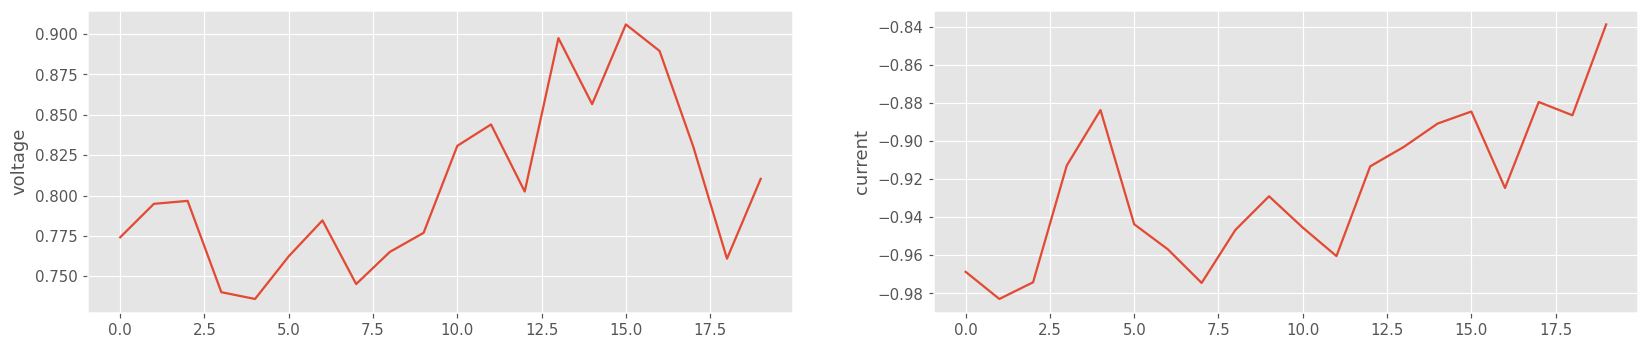

In [15]:
data, label = train_ds[0]
fig, axs = plt.subplots(1, len(config.sensor_headers), figsize=(2000/108, 400/108), dpi=108)

for i, sensor_header in enumerate(config.sensor_headers):
    axs[i].plot(data[:, i])
    axs[i].set_ylabel("{}".format(sensor_header))

## Next Stage
Up next we'll train a model on the sample data. [Click here to continue](./4_model_training.ipynb).